## Import required python libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import math


## Read csv file containing data of all star tracks


In [2]:
df = pd.read_csv('star data.csv')

## Print the csv file

In [25]:
print(df.to_string())


     star no  track no     x1     y1   r1     x2     y2   r2  nrot  drot  csd    csr   delz     range         l         m         n
0          1         1   99.4    8.2    4   99.4    8.5   49     0     1   50   45.0  0.090  0.300540  0.000000 -0.998205  0.059892
1          1         2   99.4    8.2    4   99.5    8.1    5     0     0   50   49.0  0.098  0.142773 -0.700412  0.700412  0.137281
2          1         3   99.4    8.2    4   99.3    8.7   48     0     1   50   44.0  0.088  0.510206  0.195999 -0.979997  0.034496
3          1         4   99.4    8.2    4   99.4    8.3   44     0     1   50   40.0  0.080  0.101272  0.000000 -0.987441  0.157991
4          1         5   99.4    8.2    4   99.5    8.1   42     0     1   50   38.0  0.076  0.142236 -0.703058  0.703058  0.106865
5          1         6   99.4    8.2    4   99.5    8.1   47     0     1   50   43.0  0.086  0.142463 -0.701934  0.701934  0.120733
6          1         7   99.4    8.2    4   99.6    8.2    5     0     0   5

## Showing limited no. of rows 
##### nrot = No. of rotations
##### drot = Direction of rotaion (0 for clockwise and 1 for anti-clockwise)


In [4]:
df

,star no,track no,x1,y1,r1,x2,y2,r2,nrot,drot,csd
0,1,1,99.4,8.2,4,99.4,8.5,49,0,1,50
1,1,2,99.4,8.2,4,99.5,8.1,5,0,0,50
2,1,3,99.4,8.2,4,99.3,8.7,48,0,1,50
3,1,4,99.4,8.2,4,99.4,8.3,44,0,1,50
4,1,5,99.4,8.2,4,99.5,8.1,42,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...
143,11,9,110.9,6.3,36,110.8,6.4,43,0,1,50
144,11,10,110.9,6.3,36,110.8,6.5,35,0,0,50
145,11,11,110.9,6.3,36,110.5,5.9,32,0,1,50
146,11,12,110.9,6.3,36,110.7,6.1,43,0,1,50


## Different conditions for circular scale reading (csr)

In [5]:
conditions =[
    (df['drot']==0) & (df['csd']==50),
    (df['drot']==1) & (df['csd']==50) & (df['r1']>df['r2']),
    (df['drot']==1) & (df['csd']==50) & (df['r1']<df['r2']),
    (df['drot']==0) & (df['csd']==200),
    (df['drot']==1) & (df['csd']==200) & (df['r1']>df['r2']),
    (df['drot']==1) & (df['csd']==200) & (df['r1']<df['r2'])
]

choices = [
    (50-df['r2'])+df['r1'],
    (50-df['r1'])+df['r2'],
    df['r2']-df['r1'],
    (200-df['r2'])+df['r1'],
    (200-df['r1'])+df['r2'],
    df['r2']-df['r1']
]

df['csr']=np.select(conditions, choices, default=np.nan)

### Range is calculated
### Shrinkage Factor , S = 0.002 is used

In [6]:
df['delz']=0.002*df['csr']

In [7]:
df['range']=((df['x2']-df['x1'])**2 + (df['y2']-df['y1'])**2 + (0.2*df['delz'])**2)**0.5

In [8]:
df

,star no,track no,x1,y1,r1,x2,y2,r2,nrot,drot,csd,csr,delz,range
0,1,1,99.4,8.2,4,99.4,8.5,49,0,1,50,45.0,0.090,0.300540
1,1,2,99.4,8.2,4,99.5,8.1,5,0,0,50,49.0,0.098,0.142773
2,1,3,99.4,8.2,4,99.3,8.7,48,0,1,50,44.0,0.088,0.510206
3,1,4,99.4,8.2,4,99.4,8.3,44,0,1,50,40.0,0.080,0.101272
4,1,5,99.4,8.2,4,99.5,8.1,42,0,1,50,38.0,0.076,0.142236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,11,9,110.9,6.3,36,110.8,6.4,43,0,1,50,7.0,0.014,0.141449
144,11,10,110.9,6.3,36,110.8,6.5,35,0,0,50,51.0,0.102,0.224535
145,11,11,110.9,6.3,36,110.5,5.9,32,0,1,50,46.0,0.092,0.565985
146,11,12,110.9,6.3,36,110.7,6.1,43,0,1,50,7.0,0.014,0.282857


## Plot of histogram of range

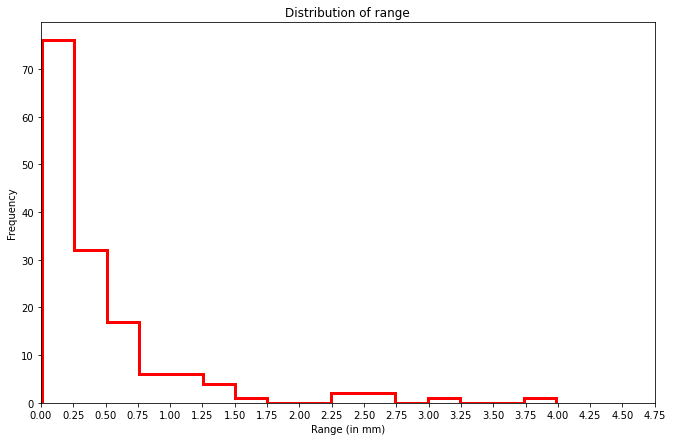

In [9]:
plt.figure(figsize=(11,7))
plt.hist(df['range'],histtype='step',linewidth=3,color='red',bins=16)
plt.xlim([0, max(df['range'])+0.25])
plt.xticks(np.arange(0,5,.25))
plt.xlabel('Range (in mm)')
plt.ylabel('Frequency')
plt.title('Distribution of range')
plt.savefig('Distribution of range.jpg',dpi=300)
plt.show()

## Range distribution table

In [10]:
count = df['range'].value_counts(bins=[0,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25])
#count = df['range'].value_counts(bins=18)
count = count.sort_index()
print('     Range   ' + '   No. of events   ')
print(count)

     Range      No. of events   
(-0.001, 0.25]    76
(0.25, 0.5]       26
(0.5, 0.75]       23
(0.75, 1.0]        5
(1.0, 1.25]        7
(1.25, 1.5]        4
(1.5, 1.75]        1
(1.75, 2.0]        0
(2.0, 2.25]        0
(2.25, 2.5]        2
(2.5, 2.75]        2
(2.75, 3.0]        0
(3.0, 3.25]        1
(3.25, 3.5]        0
(3.5, 3.75]        0
(3.75, 4.0]        1
(4.0, 4.25]        0
Name: range, dtype: int64


## Finding direction cosines of the tracks

In [11]:
df['l']=(df['x1']-df['x2'])/df['range']
df['m']=(df['y1']-df['y2'])/df['range']
df['n']=(0.2*df['delz'])/df['range']

In [12]:
df

,star no,track no,x1,y1,r1,x2,y2,r2,nrot,drot,csd,csr,delz,range,l,m,n
0,1,1,99.4,8.2,4,99.4,8.5,49,0,1,50,45.0,0.090,0.300540,0.000000,-0.998205,0.059892
1,1,2,99.4,8.2,4,99.5,8.1,5,0,0,50,49.0,0.098,0.142773,-0.700412,0.700412,0.137281
2,1,3,99.4,8.2,4,99.3,8.7,48,0,1,50,44.0,0.088,0.510206,0.195999,-0.979997,0.034496
3,1,4,99.4,8.2,4,99.4,8.3,44,0,1,50,40.0,0.080,0.101272,0.000000,-0.987441,0.157991
4,1,5,99.4,8.2,4,99.5,8.1,42,0,1,50,38.0,0.076,0.142236,-0.703058,0.703058,0.106865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,11,9,110.9,6.3,36,110.8,6.4,43,0,1,50,7.0,0.014,0.141449,0.706968,-0.706968,0.019795
144,11,10,110.9,6.3,36,110.8,6.5,35,0,0,50,51.0,0.102,0.224535,0.445364,-0.890728,0.090854
145,11,11,110.9,6.3,36,110.5,5.9,32,0,1,50,46.0,0.092,0.565985,0.706733,0.706733,0.032510
146,11,12,110.9,6.3,36,110.7,6.1,43,0,1,50,7.0,0.014,0.282857,0.707072,0.707072,0.009899


### Creating dictionary of separate dataframes for all the stars (with l,m,n values only)

In [13]:
dfs = {}
for i in range(1,12):
    dfs[i] = df.loc[(df['star no'] == i), ['l','m','n']]

#### Table for l,m,n values of star no. 10 is shown for example.

In [14]:
dfs[10]

,l,m,n
120,0.970141,0.242535,0.001940
121,0.447211,-0.894421,0.003578
122,-0.599962,-0.799950,0.011199
123,-0.999800,0.000000,0.019996
124,-0.799950,-0.599962,0.011199
125,-0.907913,-0.419037,0.010057
126,-0.975909,-0.216869,0.023856
127,0.000000,-0.979820,0.199883
128,-0.114624,0.993407,0.001834
129,0.000000,0.000000,1.000000


### Converting pandas dataframe to list of numpy arrays

In [15]:
arraylist = list()
for i in range(1,12):
    arraylist.append(dfs[i][['l','m','n']].to_numpy())

In [16]:
arraylist[0]

array([[ 0.        , -0.99820485,  0.05989229],
       [-0.70041202,  0.70041202,  0.13728076],
       [ 0.19599941, -0.97999707,  0.0344959 ],
       [ 0.        , -0.98744063,  0.1579905 ],
       [-0.70305758,  0.70305758,  0.10686475],
       [-0.70193433,  0.70193433,  0.12073271],
       [-0.99523231,  0.        ,  0.09753277],
       [-0.99697562,  0.07669043,  0.01257723],
       [-0.98486277,  0.        ,  0.17333585],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.99523231,  0.09753277],
       [-0.98349006,  0.        ,  0.18096217],
       [ 0.        ,  0.        ,  1.        ],
       [-0.44705269, -0.89410537,  0.02682316]])

### Combination of l1l2 , m1m2 , n1n2 for all the tracks are calculated

In [17]:
comb_list = list()
for i in range(0,11):
    comb_list.append([(b1 * a1, b2 * a2,b3 * a3) for (a1, a2, a3), (b1, b2, b3) in combinations(arraylist[i], 2)]) 


In [18]:
d={}
for i in range(0,11):
    d[i]=pd.DataFrame(comb_list[i], columns = ['l1l2','m1m2','n1n2'])

## Space angle calculation

In [19]:
for i in range(0,11):
    d[i]['cosx']=(d[i]['l1l2']+d[i]['m1m2']+d[i]['n1n2'])
    d[i]['space angle']= np.degrees(np.arccos(d[i]['cosx']))

In [20]:
d[9]

,l1l2,m1m2,n1n2,cosx,space angle
0,0.433857,-0.216929,0.000007,0.216936,77.470890
1,-0.582048,-0.194016,0.000022,-0.776042,140.899612
2,-0.969947,0.000000,0.000039,-0.969908,165.908444
3,-0.776064,-0.145512,0.000022,-0.921554,157.154350
4,-0.880804,-0.101631,0.000020,-0.982415,169.239278
...,...,...,...,...,...
100,0.622683,-0.366284,0.000492,0.256891,75.114335
101,0.530190,-0.467815,0.000045,0.062420,86.421258
102,-0.126261,-0.547129,0.000962,-0.672428,132.254750
103,-0.107506,-0.698789,0.000088,-0.806207,143.727022


In [21]:
allangle=pd.DataFrame()
for i in range(0,11):
    allangle=allangle.append(d[i],ignore_index=True)

In [22]:
allangle

,l1l2,m1m2,n1n2,cosx,space angle
0,-0.000000,-0.699155,0.008222,-0.690933,133.703979
1,0.000000,0.978238,0.002066,0.980304,11.390520
2,0.000000,0.985668,0.009462,0.995130,5.656647
3,-0.000000,-0.701795,0.006400,-0.695395,134.058711
4,-0.000000,-0.700674,0.007231,-0.693443,133.903297
...,...,...,...,...,...
945,0.314904,-0.629809,0.000899,-0.314005,108.300764
946,0.444667,-0.000000,0.005080,0.449747,63.272535
947,0.499711,0.499711,0.000322,0.999744,1.295817
948,0.705627,0.000000,0.001818,0.707445,44.972575


## Histogram plot for distribution of space angle

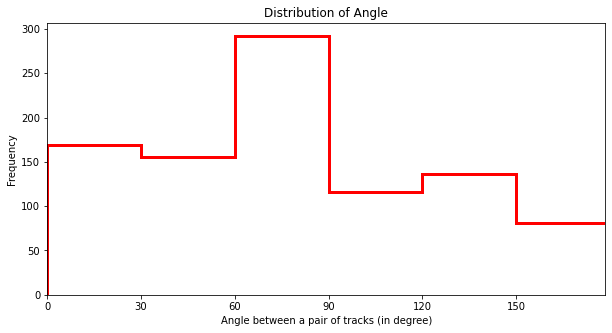

In [23]:
plt.figure(figsize=(10,5))
plt.hist(allangle['space angle'],histtype='step',linewidth=3,color='red',bins=[0,30,60,90,120,150,180])
plt.xlim([0, max(allangle['space angle'])])
plt.xticks(np.arange(0,180,30))
plt.xlabel('Angle between a pair of tracks (in degree)')
plt.ylabel('Frequency')
plt.title('Distribution of Angle')
plt.savefig('Distribution of angle.jpg',dpi=300)
plt.show()
